Características dos dados:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Primeiras 5 amostras dos dados:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Classes dos vinhos (alvo):
['class_0' 'class_1' 'clas

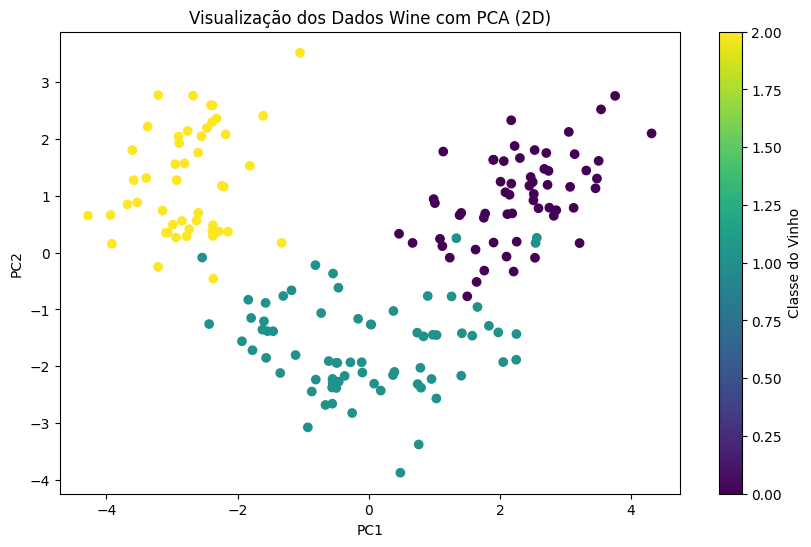


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Matriz de Confusão:
[[18  1  0]
 [ 0 21  0]
 [ 0  0 14]]


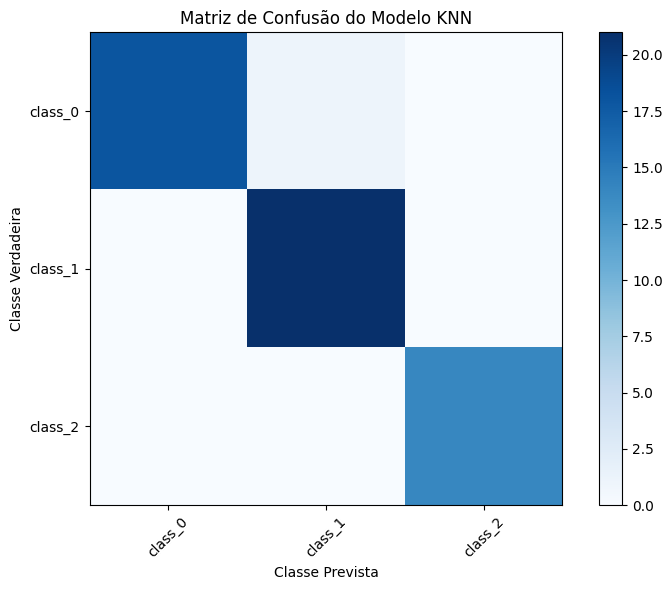

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Carregar o Conjunto de Dados Wine
wine = load_wine()
X = wine.data  # Características dos vinhos
y = wine.target  # Rótulos (classes dos vinhos)

# 2. Exploração Inicial dos Dados
print("Características dos dados:")
print(wine.feature_names)
print("\nPrimeiras 5 amostras dos dados:")
print(X[:5])
print("\nClasses dos vinhos (alvo):")
print(wine.target_names)

# 3. Pré-processamento - Normalização dos Dados
# O PCA é sensível à escala dos dados, então vamos normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA - Reduzindo para 2 Dimensões
# Aplicar PCA para reduzir a dimensionalidade para 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualização dos Dados com PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("Visualização dos Dados Wine com PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Classe do Vinho')
plt.show()

# 6. Divisão dos Dados para Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 7. Treinamento do Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 8. Avaliação do Modelo
y_pred = knn.predict(X_test)

# Imprimir o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

# 9. Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão do Modelo KNN")
plt.colorbar()
tick_marks = np.arange(len(wine.target_names))
plt.xticks(tick_marks, wine.target_names, rotation=45)
plt.yticks(tick_marks, wine.target_names)

plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.tight_layout()
plt.show()
